In [1]:
import networkx as nx

## 1. The Simulation class

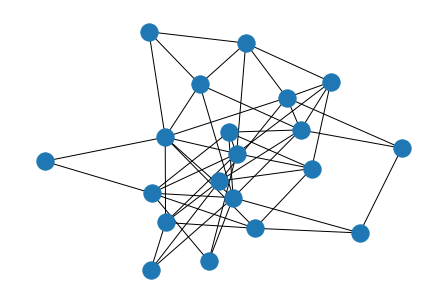

In [2]:
G=nx.gnm_random_graph(20,50)
nx.draw(G)

In [3]:
def initial_state(G):
    state={}
    for node in G.nodes:
        state[node]='asleep'
    return state

In [4]:
initial_state(G)

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

In [5]:
import random

P_AWAKEN=0.2
def state_transition(G,current_state):
    next_state={}
    for node in G.nodes:
        if current_state[node]=='asleep':
            if random.random()<P_AWAKEN:
                next_state[node]='awake'
    return next_state

In [6]:
test_state=initial_state(G)
state_transition(G,test_state)

{4: 'awake', 12: 'awake', 19: 'awake'}

In [8]:
from simulation import Simulation

sim=Simulation(G,initial_state,state_transition,name='Simple Sim')

In [9]:
sim.state()

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

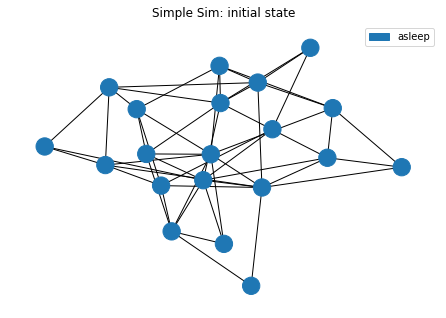

In [10]:
sim.draw()

In [11]:
sim.run()

In [12]:
sim.steps

1

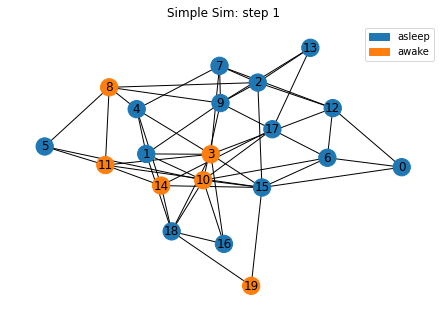

In [13]:
sim.draw(with_labels=True)

In [14]:
sim.state()

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'awake',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'awake',
 9: 'asleep',
 10: 'awake',
 11: 'awake',
 12: 'asleep',
 13: 'asleep',
 14: 'awake',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'awake'}

In [15]:
sim.run(10)

In [16]:
sim.steps

11

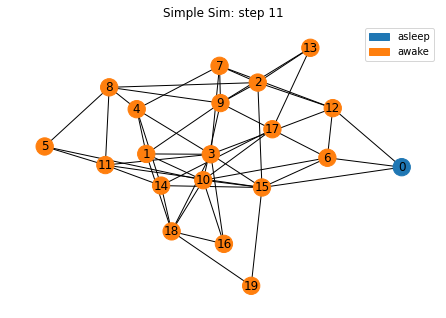

In [17]:
sim.draw(with_labels=True)

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

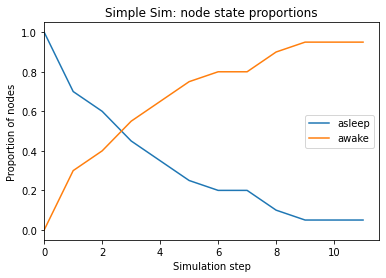

In [18]:
sim.plot()

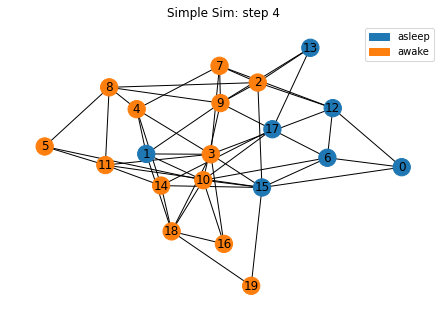

In [19]:
sim.draw(4,with_labels=True)

In [20]:
sim.state(4)

{0: 'asleep',
 1: 'asleep',
 2: 'awake',
 3: 'awake',
 4: 'awake',
 5: 'awake',
 6: 'asleep',
 7: 'awake',
 8: 'awake',
 9: 'awake',
 10: 'awake',
 11: 'awake',
 12: 'asleep',
 13: 'asleep',
 14: 'awake',
 15: 'asleep',
 16: 'awake',
 17: 'asleep',
 18: 'awake',
 19: 'awake'}

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

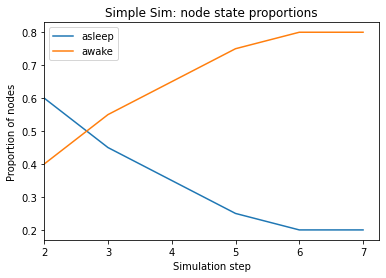

In [21]:
sim.plot(min_step=2,max_step=8)

## 2. The voter model

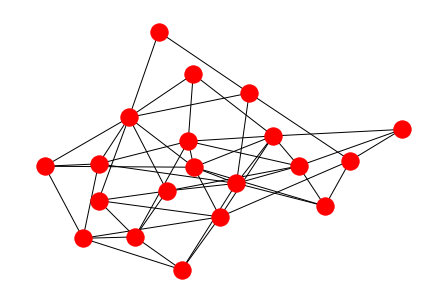

In [22]:
G = nx.gnm_random_graph(20,50)
nx.draw(G,node_color="red")

In [23]:
import random
import string

def initial_state(G):
    state={}
    for node in G.nodes:
        state[node]=random.choice('ABCD')
    return state

In [24]:
initial_state(G)

{0: 'C',
 1: 'C',
 2: 'C',
 3: 'D',
 4: 'C',
 5: 'C',
 6: 'A',
 7: 'B',
 8: 'D',
 9: 'B',
 10: 'B',
 11: 'A',
 12: 'D',
 13: 'A',
 14: 'B',
 15: 'C',
 16: 'C',
 17: 'A',
 18: 'B',
 19: 'C'}

In [25]:
def state_transition(G,current_state):
    next_state={}
    for node in G.nodes:
        if G.degree(node)>0:
            neighbor=random.choice(list(G.neighbors(node)))
            next_state[node]=current_state[neighbor]
    return next_state

In [26]:
test_state=initial_state(G)
state_transition(G,test_state)

{0: 'D',
 1: 'D',
 2: 'B',
 3: 'D',
 4: 'D',
 5: 'D',
 6: 'D',
 7: 'D',
 8: 'B',
 9: 'D',
 10: 'D',
 11: 'D',
 12: 'D',
 13: 'A',
 14: 'D',
 15: 'C',
 16: 'C',
 17: 'C',
 18: 'C',
 19: 'C'}

In [27]:
import matplotlib.pyplot as plt
sim=Simulation(G,initial_state,state_transition,name='Voter Model')

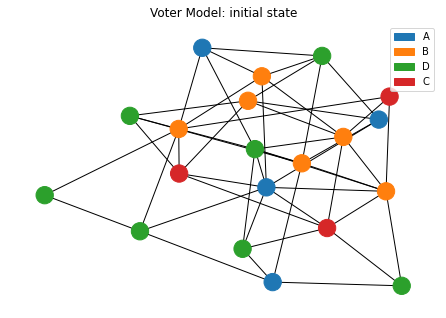

In [28]:
sim.draw()

In [29]:
sim.run(40)

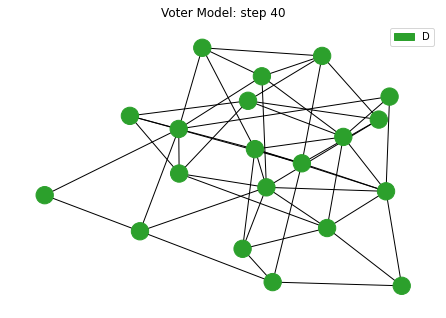

In [30]:
sim.draw()

<AxesSubplot:title={'center':'Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

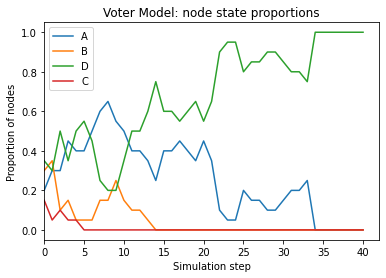

In [31]:
sim.plot()

In [32]:
import random

def state_transition(G,current_state):
    next_state={}
    for node in G.nodes:
        if G.degree(node)>0:
            neighbor=random.choice(list(G.neighbors(node)))
            next_state[node]=current_state[neighbor]
    return next_state

In [33]:
def state_transition_async(G, current_state):
    nodes_to_update=list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node)>0:
            neighbor=random.choice(list(G.neighbors(node)))
            current_state[node]=current_state[neighbor]
    return current_state

<AxesSubplot:title={'center':'Async Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

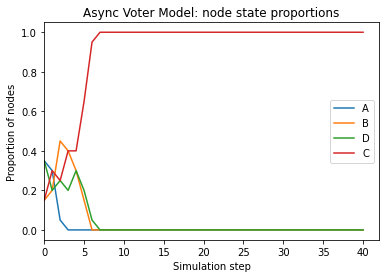

In [34]:
sim=Simulation(G,initial_state,state_transition_async,name='Async Voter Model')
sim.run(40)
sim.plot()

In [35]:
def stop_condition(G,current_state):
    unique_state_values=set(current_state.values())
    is_stopped=len(unique_state_values)<=1
    return is_stopped

In [36]:
sim=Simulation(G,initial_state,state_transition,stop_condition,name='Voter model')
sim.run(100)

Stop condition met at step 21.


In [37]:
sim.steps

21

<AxesSubplot:title={'center':'Voter model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

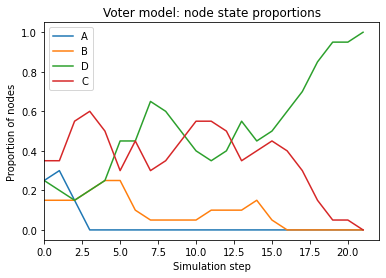

In [38]:
sim.plot()

In [39]:
def state_transition_async_rewiring(G,current_state):
    nodes_to_update=list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node)>0:
            neighbor=random.choice(list(G.neighbors(node)))
            current_state[node]=current_state[neighbor]
            neighbor=random.choice(list(G.neighbors(node)))
            if current_state[node] != current_state[neighbor]:
                G.remove_edge(node,neighbor)
            
    return current_state

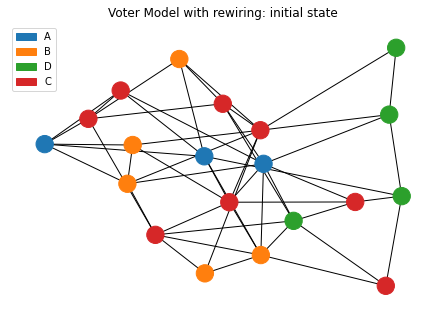

In [40]:
sim = Simulation(G,initial_state,state_transition_async_rewiring,stop_condition,name='Voter Model with rewiring')
sim.draw()

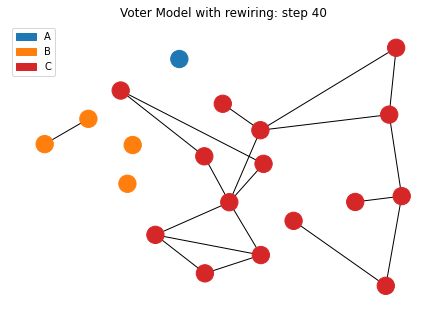

In [41]:
sim.run(40)
sim.draw()

<AxesSubplot:title={'center':'Voter Model with rewiring: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

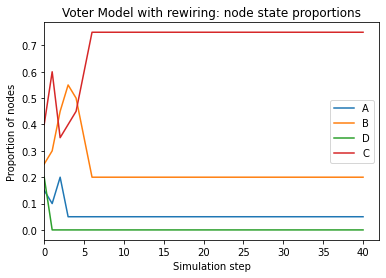

In [42]:
sim.plot()

## 3. The SIS model

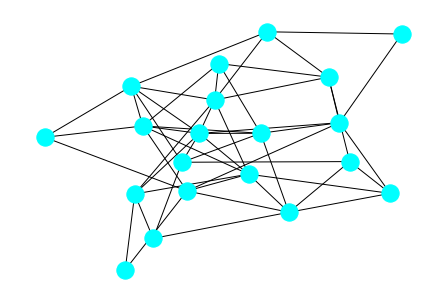

In [44]:
G = nx.gnm_random_graph(20,50)
nx.draw(G,node_color="cyan")

In [45]:
def initial_state(G):
    state={}
    for node in G.nodes:
        state[node]='S'
    patient_zero=random.choice(list(G.nodes))
    state[patient_zero]='I'
    return state

In [46]:
initial_state(G)

{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'S',
 9: 'S',
 10: 'S',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S',
 15: 'S',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'I'}

In [47]:
MU=0.1
BETA=0.1
def state_transition(G, current_state):
    next_state={}
    for node in G.nodes:
        if current_state[node]=='I':
            if random.random()<MU:
                next_state[node]='S'
        else: 
            for neighbor in G.neighbors(node):
                if current_state[neighbor]=='I':
                    if random.random()<BETA:
                        next_state[node]='I'

    return next_state

In [48]:
test_state=initial_state(G)
state_transition(G,test_state)

{}

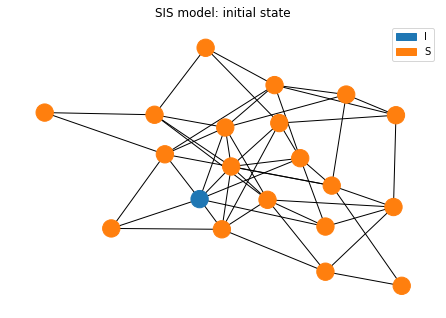

In [49]:
sim=Simulation(G,initial_state,state_transition,name='SIS model')
sim.draw()

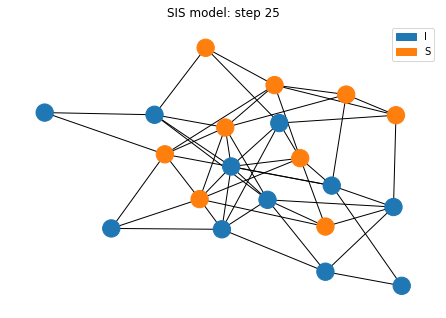

In [50]:
sim.run(25)
sim.draw()

<AxesSubplot:title={'center':'SIS model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

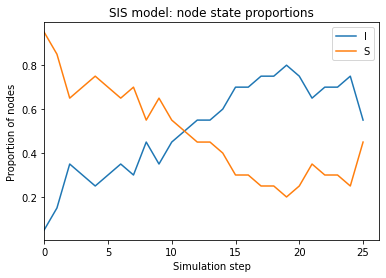

In [51]:
sim.plot()